<h1><center>STAT-542 HW7</center></h1>
Sharvi Tomar (stomar2)

## Question 1 [35 Points] Local Linear Regression


We have implemented the Nadaraya-Watson kernel estimator in HW 6. In this question, we will investigate a local linear regression:

$$
\widehat{f}\left(x\right)=\widehat{\beta}_{0}\left(x\right)+ \widehat{\beta}_{1}\left(x\right) x,
$$

where $x$ is a testing point. Local coefficients $\widehat{\beta}_{r}\left(x \right)$ for $r=0, 1$ are obtained by minimizing the object function
$$
\underset{\beta_{0}(x), \, \beta_{1}(x)}{\operatorname{minimize}} \quad \sum_{i=1}^{n} K_{\lambda} \left(x, x_{i}\right) \Big[y_{i}-\beta_{0}(x) - \beta_1(x) x_{i} \Big]^{2}.
$$

In this question, we will use the Gaussian kernel $K(u) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{u^2}{2}}$.

a) [20 pts] Write a function `myLocLinear(trainX, trainY, testX, lambda)`, where `lambda` is the bandwidth and `testX` is all testing samples. This function returns predictions on `testX`. The solution of $\beta_{0}(x)$ and $\beta_{1}(x)$ can be obtained by fitting a weighted linear regression. The formula is provided on Page 25 of our [lecture note](https://teazrq.github.io/stat542/notes/Kernel.pdf). 



In [362]:
from numpy.linalg import inv, det

def gaussian_kernel(z):
    return  (1/math.sqrt(2*math.pi))* math.exp((-z**2)/2)

In [241]:
def myLocLinear(trainX, trainY, testX, lambda_val):
    """returns predictions on testX""" 
    W = [[]] * testX.shape[0]
    pred = np.zeros(testX.shape[0])

    for i in range(len(testX)):
        for x in trainX:
            W[i]= np.append(W[i],gaussian_kernel((testX[i] - x)/lambda_val))
                    
        pred[i] = np.dot(np.reciprocal(trainX.T @ np.diag(W[i]) @ trainX), trainX.T @ np.diag(W[i]) @ trainY)

    return pred  

b) [15 pts] Fit a local linear regression with our given training data. The testing data are generated using the code given below. Try a set of bandwidth  $\lambda = 0.05, 0.1, \ldots, 0.55, 0.6$ when calculating the kernel function. 
  - Provide a plot of testing MSE vs $\lambda$. Does your plot show a "U" shape?
  - Report the best testing MSE with the corresponding $\lambda$.
  - Plot three figures of your fitted testing data curve, with $\lambda = 0.05, 0.25$, and $0.5$. Add the true function curve (see the following code for generating the truth) and the training data points onto this plot. Label each $\lambda$ and your curves. Comment on the the shape of fitted curves as your $\lambda$ changes. 


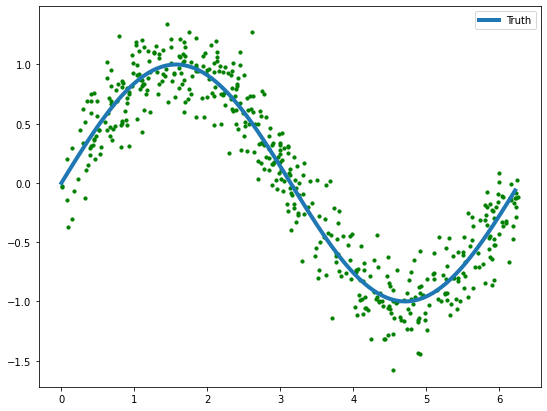

In [242]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

train = pd.read_csv("hw7_Q1_train.csv")

testX = 2 * math.pi * np.arange(0, 1, 0.01)
testY = []
  
for i in range(len(testX)):
    testY.append(math.sin(testX[i]))

plt.figure(figsize=(9,7))
plt.plot(testX, testY, linewidth=4) 
plt.scatter(train["x"],train["y"], c='green', s=10)
plt.legend(["Truth"])

In [258]:
# Fitting the local linear regression with given training data

from sklearn.metrics import mean_squared_error
lambda_seq = np.arange(0.05, 0.6, 0.05)

mse = np.zeros(len(lambda_seq))
pred = [[]] * len(lambda_seq)

for i in range(len(lambda_seq)):
    pred[i] = myLocLinear(train["x"],train["y"], testX, lambda_seq[i])
    mse[i] = mean_squared_error(pred[i], testY)

Text(0, 0.5, 'MSE')

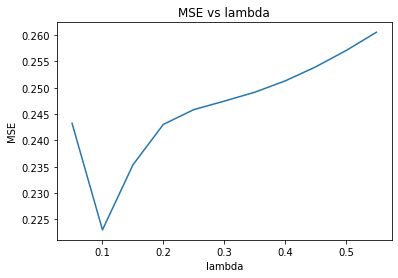

In [257]:
# Plot of testing MSE vs  𝜆

plt.plot(lambda_seq, mse)   
plt.title("MSE vs lambda")
plt.xlabel("lambda")
plt.ylabel("MSE")

The mse initially decreases with lambda and then starts to increase with lambda. The plot does not exactly look like "U" shaped but more like a "V" in the beginning.

In [259]:
# Report the best testing MSE with the corresponding  𝜆

print("The best testing mse is",min(mse), "with the corresponding lambda value of",lambda_seq[np.argmin(mse)])

The best testing mse is 0.22300860833936934 with the corresponding lambda value of 0.1


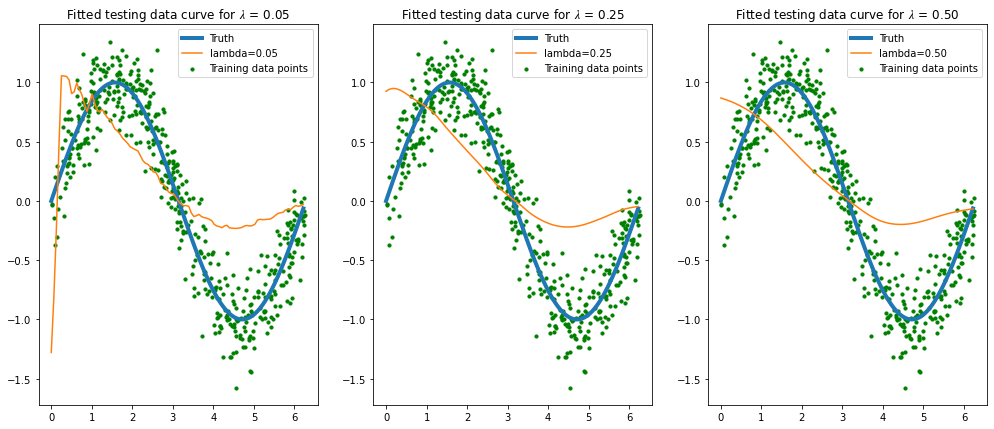

In [266]:
# Plot three figures of your fitted testing data curve
plt.figure(figsize=(17,7))

plt.subplot(1, 3, 1)
plt.plot(testX, testY, linewidth=4) 
plt.plot(testX, pred[0])
plt.scatter(train["x"],train["y"], c='green', s=10)
plt.title("Fitted testing data curve for $𝜆$ = 0.05")
plt.legend(["Truth","lambda=0.05","Training data points"])

plt.subplot(1, 3, 2)
plt.plot(testX, testY, linewidth=4) 
plt.plot(testX, pred[4])
plt.scatter(train["x"],train["y"], c='green', s=10)
plt.title("Fitted testing data curve for $𝜆$ = 0.25")
plt.legend(["Truth","lambda=0.25","Training data points"])

plt.subplot(1, 3, 3)
plt.plot(testX, testY, linewidth=4) 
plt.plot(testX, pred[9])
plt.scatter(train["x"],train["y"], c='green', s=10)
plt.title("Fitted testing data curve for $𝜆$ = 0.50")
plt.legend(["Truth","lambda=0.50","Training data points"])

The shape of fitted curves gets smoother as the  𝜆  increases. For 𝜆 = 0.05, the fitted curve is bumpy(non-smooth) with boundary value deviating greatly from the truth. For a higher 𝜆, 𝜆 = 0.25 the fitted curve looks much more stabilized and smooth. For even a higher 𝜆, 𝜆 = 0.50 the fitted curve looks even more stabilized and smooth, as per the selected gaussain kernel. The boundary points suffer smaller bias with greater neighbourhood considered. 

## Question 2 [35 Points] Linear Discriminant Analysis

For both question 2 and 3, you need to write your own code. We will use the handwritten digit recognition data from the `ElemStatLearn` package. We only consider the train-test split, with the pre-defined `zip.train` and `zip.test`. Simply use `zip.train` as the training data, and `zip.test` as the testing data for all evaluations and tuning. No cross-validation is needed in the training process.

  - The data consists of 10 classes: digits 0 to 9 and 256 features ($16 \times 16$ grayscale image). 
  - More information can be attained by code `help(zip.train)`.

In [52]:
zip_train = pd.read_csv("train.csv")
zip_test = pd.read_csv("test.csv")

  a. [10 pts] Estimate the mean, covariance matrix of each class and pooled covariance matrix. Basic built-in R functions such as `cov` are allowed. Do NOT print your results. 
  

In [393]:
# Estimate the mean, covariance matrix of each class and pooled covariance matrix

grouped = zip_train.groupby("V1")
class_mean = grouped.mean().values.tolist()                                   # Converted df to list
class_cov = grouped[list(zip_train.columns)[1:]].cov().values.tolist()              #  \\ df to list
pooled_cov = zip_train.iloc[:,1:].cov().values.tolist()                               #  df 

b. [15 pts] Write your own linear discriminate analysis (LDA) code following our lecture note. To perform this, you should calculate $\mu_k$, $\pi_k$, and $\Sigma$ from the data. You may consider saving $\mu_k$'s and $\pi_k$'s as a list (with 10 elements in each list). 
  
  
You are not required to write a single function to perform LDA, but you could consider defining a function as `myLDA(testX, mu_list, sigma_pool)`, where `mu_list` is the estimated mean vector for each class, and `sigma_pool` is the pooled variance estimation. This function should return the predicted class based on comparing __discriminant functions__  $\delta_k(x) = w_k^T x + b_k$ given on page 32 of the [lecture note](https://teazrq.github.io/stat542/notes/Class.pdf).

In [290]:
prior = grouped.V2.count()/len(zip_train)
mu_list = np.array(class_mean)


def myLDA(testX, mu_list, sigma_pool):
    k = [[]] * testX.shape[0]
    pred = [0] * len(testX)
    
    for i in range(len(testX)):
        
        for j in range(len(prior)):
            k[i]= np.append(k[i],np.dot(testX.iloc[i].T , inv(sigma_pool)@ mu_list[j]) -0.5 * np.dot(mu_list[j].T, inv(sigma_pool)@ mu_list[j]) + np.log(prior[j]))
        pred[i] = np.argmax(k[i])
        
    return pred        

 c. [10 pts] Fit LDA model on the training data and predict with the testing data. 
  - Report the first 5 entries of the $w$ coefficient vector and $b$ for digit `0`.
  - Report a $10 \times 10$ confusion matrix, where each **column** is true digit and each **row** is your predicted digit. You can use the `table()` function in R.
  - Report a table of misclassification rate of each (true) digit. Hence, this is the $1 -$ sensitivity of each digit in a multi-class problem. Only keep the first three digits after the decimal point for the rate. Also report the overall mis-classification rate. 

In [291]:
# Fit LDA model on training data and predict with testing data

ans = myLDA(zip_test.iloc[:,1:], mu_list, pooled_cov)

In [298]:
# Report the first 5 entries of the  𝑤  coefficient vector and  𝑏  for digit 0

w = (inv(sigma_pool)@ mu_list[0])
b = -0.5 * np.dot(mu_list[0].T, inv(sigma_pool)@ mu_list[0]) + np.log(prior[0])

print("The first 5 entries of the 𝑤 coefficient vector for digit 0 are",w[:5])
print("The value of b for digit 0 is", b)

The first 5 entries of the 𝑤 coefficient vector for digit 0 are [-548.22455336   69.16711149  -38.33786357   -2.01769899   -9.22122239]
The value of b for digit 0 is -1137.8043526425063


In [292]:
# Reporting a  10×10  confusion matrix

data = {'y_Actual':    zip_test.iloc[:,0],'y_Predicted': ans }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix)

Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          345    1    0    1    3    1    4    0    1    3
1            0  251    1    2    4    0    3    0    2    1
2            6    2  153    8   13    1    1    1   13    0
3            4    0    3  140    2    6    0    2    4    5
4            2    4    4    0  172    1    3    1    1   12
5            9    0    0   20    2  121    0    0    2    6
6            2    1    4    0    6    5  151    0    1    0
7            1    1    1    1    7    0    0  127    0    9
8            7    2    2   11    4    5    1    1  128    5
9            0    1    0    0    6    0    0    5    2  163


In [293]:
# Misclassification rate for each label

from tabulate import tabulate

mis = np.zeros(10)
for i in range(10):
    mis[i]=round((sum(confusion_matrix[i])-confusion_matrix[i][i])/sum(confusion_matrix[i]), 3)
data = [[i, mis[i]] for i in range(10)] 

print(tabulate(data, headers=["Label", "Misclassification Rate"]))

  Label    Misclassification Rate
-------  ------------------------
      0                     0.082
      1                     0.046
      2                     0.089
      3                     0.235
      4                     0.215
      5                     0.136
      6                     0.074
      7                     0.073
      8                     0.169
      9                     0.201


In [211]:
# Overall mis-classification rate

overall_mis = round(1- (sum(np.diag(confusion_matrix))/len(zip_test)), 3)
print("The overall misclassification rate rounded upto 3 decimal places is:", overall_mis)

The overall misclassification rate rounded upto 3 decimal places is: 0.128


## Question 3 [30 points] Regularized quadratic discriminate analysis

QDA uses a quadratic discriminant function. However, QDA does not work directly in this example because we do not have enough samples to provide an invertible sample covariance matrix for each digit. An alternative idea to fix this issue is to consider a regularized QDA method, which uses 

$$\widehat \Sigma_k(\alpha) = \alpha \widehat \Sigma_k + (1-\alpha) \widehat \Sigma $$


instead of $\Sigma_k$. Then, they are used in the decision rules given in page 36 of lecture notes. Complete the following questions

  a. [20 pts] Write your own function `myRQDA(testX, mu_list, sigma_list, sigma_pool, alpha)`, where `allpha` is a scaler `alpha` and `testX` is your testing covariate matrix. And you may need a new `sigma_list` for all the $\Sigma_k$. This function should return a vector of predicted digits.

In [408]:
prior = grouped.V2.count()/len(zip_train)
mu_list = np.array(class_mean)


def myRQDA(testX, mu_list, sigma_list, sigma_pool, alpha):
    k = [[]] * testX.shape[0]
    pred = [0] * len(testX)
    sigma_list = np.array(sigma_list)
    sigma_pool = np.array(sigma_pool)
    
    #modified_sigma = np.array([np.zeros((256,256))])
    modified_sigma = [[]] * len(prior)
    
    for j in range(len(prior)):
        modified_sigma[j] = np.array(alpha * sigma_list[256*j : 256*(j+1)] + (1-alpha) * sigma_pool)
        
        
    for i in range(len(testX)):
 
        for j in range(len(prior)):
    
            k[i] = np.append(k[i],-0.5*np.log(det(modified_sigma[j]))- 0.5* np.dot((testX.iloc[i] - mu_list[j]).T @ inv(modified_sigma[j]), (testX.iloc[i] - mu_list[j])) + np.log(prior[j]))
        
        pred[i] = np.argmax(k[i])
        
    return pred                

 b. [10 pts] Perform regularized QDA with the following sequence of $\alpha$ values. Plot the testing error (misclassification rate) against alpha. Report the minimum testing error and the corresponding $\alpha$.

In [418]:
# Fitting RQDA on test data for predictions

alpha_all = np.arange(0, 0.35, 0.05)
mis3 = np.zeros(len(alpha_all))
pred3 = [[]] * len(alpha_all)

for i in range(len(alpha_all)):
    pred3[i] = myRQDA(zip_test.iloc[:,1:], mu_list, class_cov, pooled_cov, alpha_all[i])
    mis3[i] = 1- (sum(pred3[i] == zip_test.iloc[:,0])/len(zip_test))

/Users/sharvitomar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'Testing error')

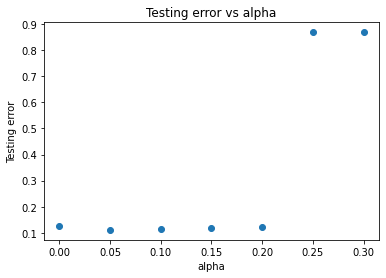

In [419]:
# Plot the testing error (misclassification rate) against alpha 

plt.scatter(alpha_all, mis3)   
plt.title("Testing error vs alpha")
plt.xlabel("alpha")
plt.ylabel("Testing error")

In [423]:
# Minimum testing error and the corresponding  𝛼 

print("The minimum testing error(misclassification rate) is", min(mis3),"and the corresponding alpha value is:", alpha_all[np.argmin(mis3)])


The minimum testing error(misclassification rate) is 0.11111111111111116 and the corresponding alpha value is: 0.05
